In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


mainset= pd.read_csv(r'C:\Users\igriz\Documents\BOOTCAMP 2024\WEEK2\DAY 4\project-1-ironhack-payments-2-en\project_dataset\consolidated_ironhack_data.csv')
print(mainset.columns)

Index(['fee_id', 'cash_request_id', 'type', 'status_x', 'category',
       'total_amount', 'reason', 'fee_created_at', 'updated_at', 'paid_at',
       'from_date', 'to_date', 'charge_moment', 'cash_request_id.1',
       'cash_request_created_at', 'amount', 'cash_status'],
      dtype='object')


In [3]:
print(mainset['status_x'].unique())

['rejected' 'accepted' 'cancelled' 'confirmed']


In [25]:
#Segment into months with datetime
mainset['fee_created_at'] = pd.to_datetime(mainset['fee_created_at'], errors='coerce')
mainset['cohort_year'] = mainset['fee_created_at'].dt.year
mainset['cohort_month'] = mainset['fee_created_at'].dt.month
mainset['cohort_month_str'] = mainset['cohort_year'].astype(str) + '-' + mainset['cohort_month'].astype(str).str.zfill(2)
#monthly_cohorts = mainset.groupby('cohort_month_str')['amount'].sum().reset_index()
#Seperating sum of all loans (amount with active status)
active_mainset = mainset[mainset['cash_status'] == 'active']
active_mainset['fee_created_at'] = pd.to_datetime(active_mainset['fee_created_at'], errors='coerce')
active_mainset['cohort_year'] = active_mainset['fee_created_at'].dt.year
active_mainset['cohort_month'] = active_mainset['fee_created_at'].dt.month
active_mainset['cohort_month_str'] = active_mainset['cohort_year'].astype(str) + '-' + active_mainset['cohort_month'].astype(str).str.zfill(2)
active_cohort=active_mainset.groupby('cohort_month_str')['amount'].sum().reset_index()
monthly_cohorts = active_mainset.groupby('cohort_month_str')['amount'].sum().reset_index()
print(monthly_cohorts)
#print(active_cohort)
#Seperating revenue from fees (total_amount with 'accepted' status)
feemaxing=mainset[mainset['status_x'] =='accepted']
feemaxing['fee_created_at'] = pd.to_datetime(active_mainset['fee_created_at'], errors='coerce')
feemaxing['cohort_year'] = feemaxing['fee_created_at'].dt.year
feemaxing['cohort_month'] = feemaxing['fee_created_at'].dt.month
feemaxing['cohort_month_str']=feemaxing['cohort_year'].astype(str)+'-'+feemaxing['cohort_month'].astype(str).str.zfill(2)
accepted_cohorts=feemaxing.groupby('cohort_month_str')['total_amount'].sum().reset_index()
print(accepted_cohorts)

  cohort_month_str  amount
0          2020-06   500.0
1          2020-07   530.0
2          2020-08  2010.0
3          2020-09  2730.0
4          2020-10  7555.0
5          2020-11   200.0
  cohort_month_str  total_amount
0      2020.0-10.0          80.0
1       2020.0-6.0          10.0
2       2020.0-7.0           5.0
3       2020.0-9.0           5.0
4          nan-nan       74110.0


C:\Users\igriz\AppData\Local\Temp\ipykernel_18876\1019882216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_mainset['fee_created_at'] = pd.to_datetime(active_mainset['fee_created_at'], errors='coerce')
C:\Users\igriz\AppData\Local\Temp\ipykernel_18876\1019882216.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_mainset['cohort_year'] = active_mainset['fee_created_at'].dt.year
C:\Users\igriz\AppData\Local\Temp\ipykernel_18876\1019882216.py:11: SettingWithCopyWarning: 
A value is trying 

C:\Users\igriz\AppData\Local\Temp\ipykernel_18876\3721774861.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_mainset['fee_created_at'] = pd.to_datetime(active_mainset['fee_created_at'], errors='coerce')
C:\Users\igriz\AppData\Local\Temp\ipykernel_18876\3721774861.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_mainset['cohort_year'] = active_mainset['fee_created_at'].dt.year
C:\Users\igriz\AppData\Local\Temp\ipykernel_18876\3721774861.py:11: SettingWithCopyWarning: 
A value is trying 

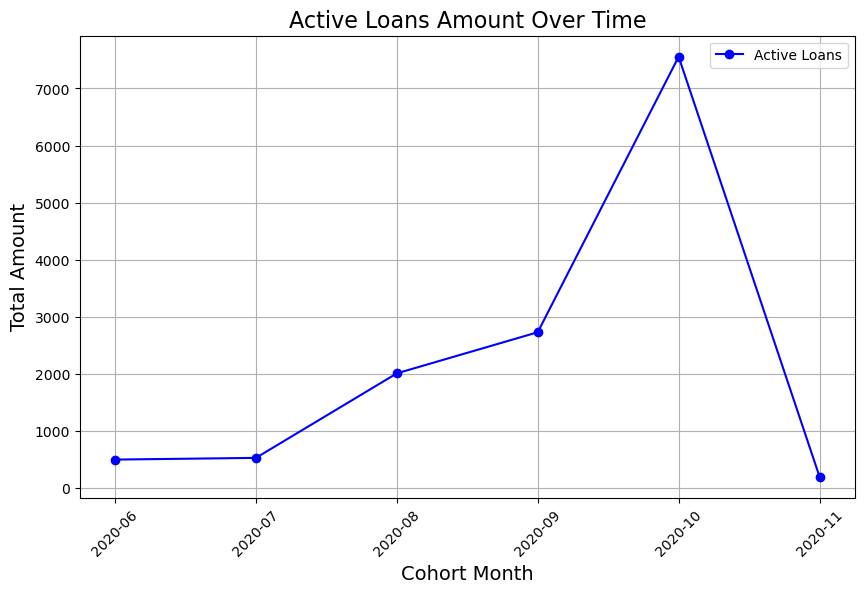

In [29]:
import matplotlib.pyplot as plt

# Filter for active status
active_mainset = mainset[mainset['cash_status'] == 'active']

# Convert 'fee_created_at' to datetime
active_mainset['fee_created_at'] = pd.to_datetime(active_mainset['fee_created_at'], errors='coerce')

# Extract year and month for cohort grouping
active_mainset['cohort_year'] = active_mainset['fee_created_at'].dt.year
active_mainset['cohort_month'] = active_mainset['fee_created_at'].dt.month
active_mainset['cohort_month_str'] = active_mainset['cohort_year'].astype(str) + '-' + active_mainset['cohort_month'].astype(str).str.zfill(2)

# Group by cohort_month_str and sum the 'amount'
active_cohort = active_mainset.groupby('cohort_month_str')['amount'].sum().reset_index()

# Plot the line plot for active loans
plt.figure(figsize=(10, 6))
plt.plot(active_cohort['cohort_month_str'], active_cohort['amount'], marker='o', color='b', label='Active Loans')
plt.title('Active Loans Amount Over Time', fontsize=16)
plt.xlabel('Cohort Month', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()



In [17]:
# Merge active and accepted cohorts
merged_cohorts = pd.merge(active_cohort, accepted_cohorts, on='cohort_month_str', how='outer', suffixes=('_active', '_accepted'))

# Create a stacked area plot
plt.figure(figsize=(12, 6))
plt.fill_between(merged_cohorts['cohort_month_str'], 0, merged_cohorts['amount_active'], color='b', alpha=0.6, label='Active Loans')
plt.fill_between(merged_cohorts['cohort_month_str'], merged_cohorts['amount_active'], merged_cohorts['amount_active'] + merged_cohorts['total_amount_accepted'], color='g', alpha=0.6, label='Accepted Fees')

plt.title('Stacked Area Plot of Active Loans and Accepted Fees by Cohort Month', fontsize=16)
plt.xlabel('Cohort Month', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'amount_active'

<Figure size 1200x600 with 0 Axes>

C:\Users\igriz\AppData\Local\Temp\ipykernel_18876\488494705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feemaxing['fee_created_at'] = pd.to_datetime(feemaxing['fee_created_at'], errors='coerce')


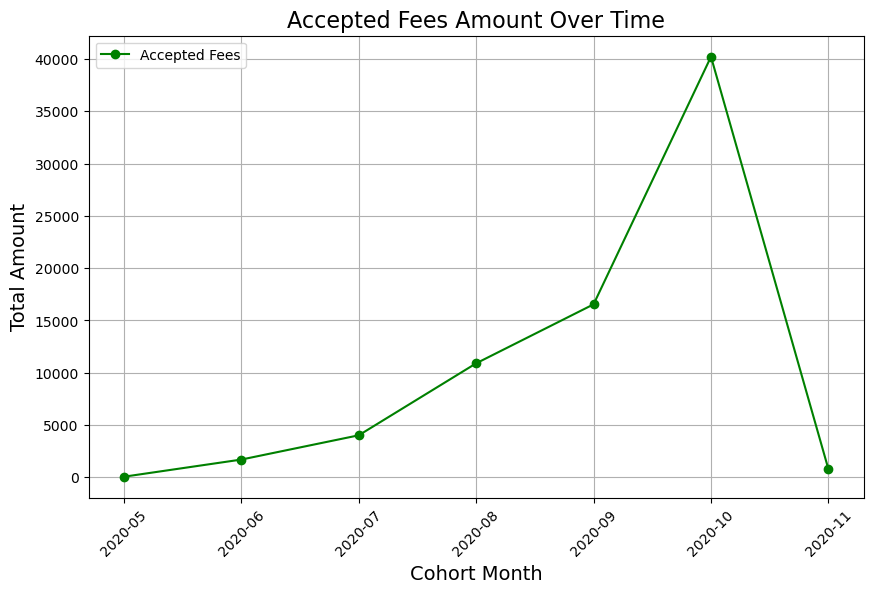

In [34]:
## Filter for accepted fees (status_x == 'accepted')
feemaxing = mainset[mainset['status_x'] == 'accepted']

# Convert 'fee_created_at' to datetime for consistent processing
feemaxing['fee_created_at'] = pd.to_datetime(feemaxing['fee_created_at'], errors='coerce')

# Extract year and month for cohort grouping (for accepted fees)
"""feemaxing['cohort_year'] = feemaxing['fee_created_at'].dt.year
feemaxing['cohort_month'] = feemaxing['fee_created_at'].dt.month
feemaxing['cohort_month_str'] = feemaxing['cohort_year'].astype(str) + '-' + feemaxing['cohort_month'].astype(str).str.zfill(2)
"""
feemaxing.loc[:, 'cohort_year'] = feemaxing['fee_created_at'].dt.year
feemaxing.loc[:, 'cohort_month'] = feemaxing['fee_created_at'].dt.month
feemaxing.loc[:, 'cohort_month_str'] = (
    feemaxing['cohort_year'].astype(str) + '-' + 
    feemaxing['cohort_month'].astype(str).str.zfill(2)
)

# Group by cohort_month_str and sum the 'total_amount' for accepted fees
accepted_cohorts = feemaxing.groupby('cohort_month_str')['total_amount'].sum().reset_index()

# Plot the line plot for accepted fees
plt.figure(figsize=(10, 6))
plt.plot(accepted_cohorts['cohort_month_str'], accepted_cohorts['total_amount'], marker='o', color='g', label='Accepted Fees')
plt.title('Accepted Fees Amount Over Time', fontsize=16)
plt.xlabel('Cohort Month', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

